In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("survey_results_public.csv")
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
data = data[['Age', 'Country', 'EdLevel', 'Employment', 'Gender', 'YearsCodePro', 'ConvertedComp']]
data = data.rename({"ConvertedComp": "Salary", "EdLevel": "Education"}, axis=1)
data.head()

,Age,Country,Education,Employment,Gender,YearsCodePro,Salary
0,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Man,27,NaN
1,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,4,NaN
2,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Man,4,NaN
4,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,8,NaN


In [5]:
data = data[data['Salary'].notnull()]
data.head()

,Age,Country,Education,Employment,Gender,YearsCodePro,Salary
7,36.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,13,116000.0
9,22.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Man,4,32315.0
10,23.0,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,2,40070.0
11,49.0,Spain,Some college/university study without earning ...,Employed full-time,Man,7,14268.0
12,53.0,Netherlands,"Secondary school (e.g. American high school, G...",Employed full-time,Man,20,38916.0


In [6]:
row , columns = data.shape

print('No. of rows: ', row)
print('No. of columns: ', columns)

No. of rows:  34756
No. of columns:  7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           30596 non-null  float64
 1   Country       34756 non-null  object 
 2   Education     34188 non-null  object 
 3   Employment    34717 non-null  object 
 4   Gender        32127 non-null  object 
 5   YearsCodePro  34621 non-null  object 
 6   Salary        34756 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.1+ MB


In [8]:
data.isnull().sum()

Age             4160
Country            0
Education        568
Employment        39
Gender          2629
YearsCodePro     135
Salary             0
dtype: int64

In [9]:
data = data.dropna()
data.isnull().sum()

Age             0
Country         0
Education       0
Employment      0
Gender          0
YearsCodePro    0
Salary          0
dtype: int64

In [10]:
data = data[data['Employment'] == "Employed full-time"]
data = data.drop('Employment', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26213 entries, 7 to 64152
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           26213 non-null  float64
 1   Country       26213 non-null  object 
 2   Education     26213 non-null  object 
 3   Gender        26213 non-null  object 
 4   YearsCodePro  26213 non-null  object 
 5   Salary        26213 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [11]:
data['Country'].value_counts()

United States                       6645
United Kingdom                      2044
India                               1972
Germany                             1710
Canada                              1027
                                    ... 
Maldives                               1
Democratic Republic of the Congo       1
Somalia                                1
Barbados                               1
Benin                                  1
Name: Country, Length: 148, dtype: int64

In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories(data.Country.value_counts(), 300)
data['Country'] = data['Country'].map(country_map)
data.Country.value_counts()

Other                 7390
United States         6645
United Kingdom        2044
India                 1972
Germany               1710
Canada                1027
Brazil                 881
France                 873
Spain                  598
Netherlands            584
Australia              570
Poland                 510
Italy                  497
Russian Federation     463
Sweden                 449
Name: Country, dtype: int64

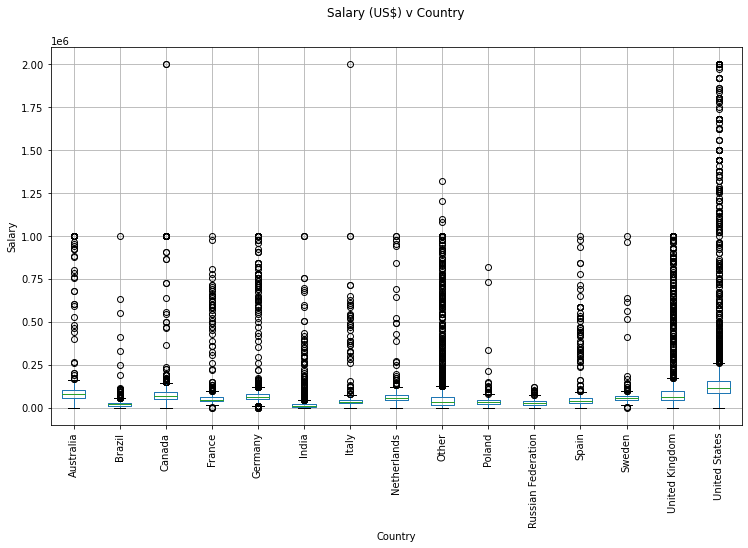

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
data = data[data["Salary"] <= 250000]
data = data[data["Salary"] >= 10000]
data = data[data['Country'] != "Other"]

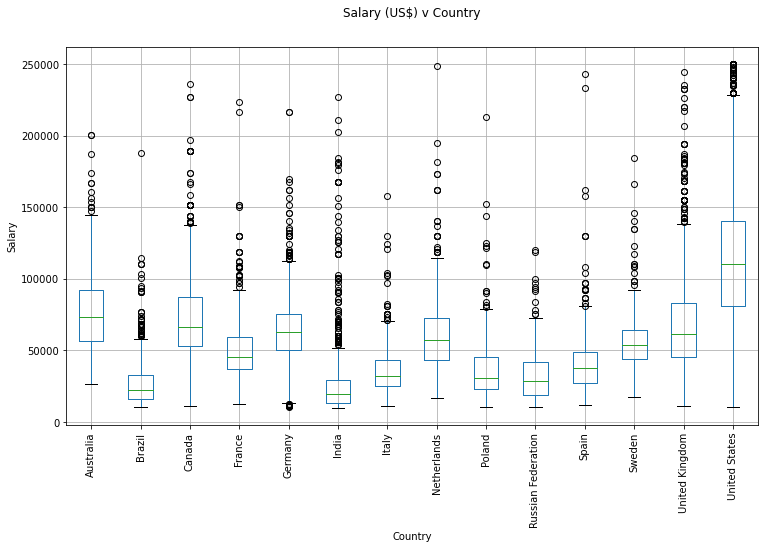

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
data['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '6', '28', '8',
       '23', '15', '25', '11', 'Less than 1 year', '5', '21', '16', '18',
       '14', '32', '9', '19', '22', '38', '30', '26', '27', '24', '17',
       '34', '35', '33', '36', '40', 'More than 50 years', '31', '37',
       '41', '45', '39', '42', '29', '43', '44', '50', '49'], dtype=object)

In [18]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

data['YearsCodePro'] = data['YearsCodePro'].apply(clean_experience)

In [19]:
data['Education'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [20]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Other degrees'

data['Education'] = data['Education'].apply(clean_education)

In [21]:
data['Education'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Other degrees',
       'Post grad'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
data["Education"] = le_edu.fit_transform(data['Education'])
data['Education'].unique()

array([0, 1, 2, 3])

In [23]:
def clean_gender(x):
    if 'Man' in x:
        return 'Male'
    if 'Woman' in x:
        return 'Female'
    return 'Other'

data['Gender'] = data['Gender'].apply(clean_gender)
data['Gender'].value_counts()

Male      14898
Female     1325
Other       148
Name: Gender, dtype: int64

In [24]:
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])
data["Gender"].unique()

array([1, 0, 2])

In [25]:
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
data["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [26]:
data.head(10)

,Age,Country,Education,Gender,YearsCodePro,Salary
7,36.0,13,0,1,13.0,116000.0
9,22.0,12,1,1,4.0,32315.0
10,23.0,12,0,1,2.0,40070.0
11,49.0,10,2,1,7.0,14268.0
12,53.0,7,2,1,20.0,38916.0
13,27.0,13,2,1,1.0,66000.0
16,25.0,13,0,1,3.0,79000.0
18,24.0,13,0,1,3.0,83400.0
23,45.0,4,3,1,20.0,91883.0
31,31.0,2,0,1,10.0,31764.0


In [27]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y, y_pred))
error

38607.039879164244

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X, y)
y_pred = dt.predict(X)

In [31]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$22,424.14


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)
y_pred = rf.predict(X)

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$23,417.32


In [34]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [35]:
regressor = gs.best_estimator_

regressor.fit(X, y)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,591.05


In [36]:
X = np.array([[33, "United States", 'Male', 'Master’s degree', 15 ]])
X

array([['33', 'United States', 'Male', 'Master’s degree', '15']],
      dtype='<U15')

In [37]:
X[:, 1] = le_country.transform(X[:,1])
X[:, 2] = le_gender.transform(X[:,2])
X[:, 3] = le_edu.transform(X[:,3])
X = X.astype(float)
X

array([[33., 13.,  1.,  1., 15.]])

In [38]:
y_pred = regressor.predict(X)
y_pred

array([139173.48066298])

In [39]:
import pickle

In [40]:
data = {"model": regressor, "le_country": le_country, "le_edu": le_edu, "le_gender": le_gender}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [41]:
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_edu = data["le_edu"]
le_gender = data["le_gender"]

In [42]:
y_pred = regressor_loaded.predict(X)
y_pred

array([139173.48066298])